# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [46]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [47]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math
*

How many years of data are logged in our dataset? 

In [48]:
# @@@ 1
# Your Code
df["YEAR"].nunique()


33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [49]:
# @@@ 2
test_col = "AVG_MATH_8_SCORE"

mi_avg = df.loc[df["STATE"] == "MICHIGAN", test_col].mean()
oh_avg = df.loc[df["STATE"] == "OHIO", test_col].mean()

mi_avg, oh_avg, "MICHIGAN" if mi_avg > oh_avg else "OHIO"

(276.1666666666667, 282.25, 'OHIO')

Find the average for your chosen test across all states in 2019

In [50]:
# @@@ 3
test_col = "AVG_MATH_8_SCORE"
avg_2019 = df.loc[df["YEAR"] == 2019, test_col].mean()
avg_2019

281.2641509433962

For each state, find a maximum value for your chosen test score

In [51]:
# @@@ 4
test_col = "AVG_MATH_8_SCORE"
state_max = df.groupby("STATE")[test_col].max()
state_max

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [52]:
# @@@ 5
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL_EST"]

Feature engineering justification: as the description gave total expenditure per student to compare it across states... bigger states obviously spend more than smaller ones but this normalizes the comparison


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

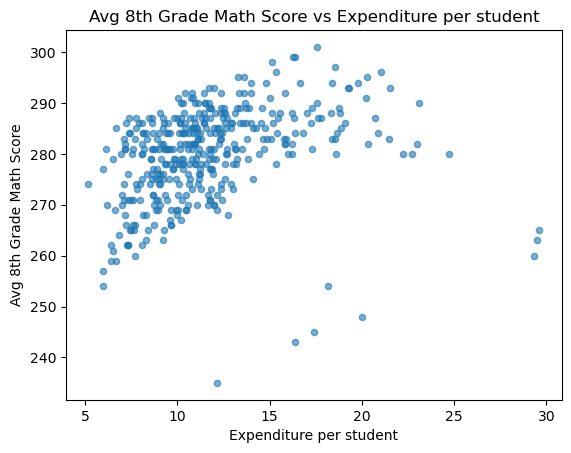

In [53]:
# @@@ 6
df.plot.scatter(x="expenditure_per_student", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Expenditure per student")
plt.ylabel("Avg 8th Grade Math Score")
plt.title(f"Avg 8th Grade Math Score vs Expenditure per student")
plt.show()

Observations:
There seems to be a slight positive correlation between the expenditure per student and their test scores in 8th grade.

**Visualization 2**

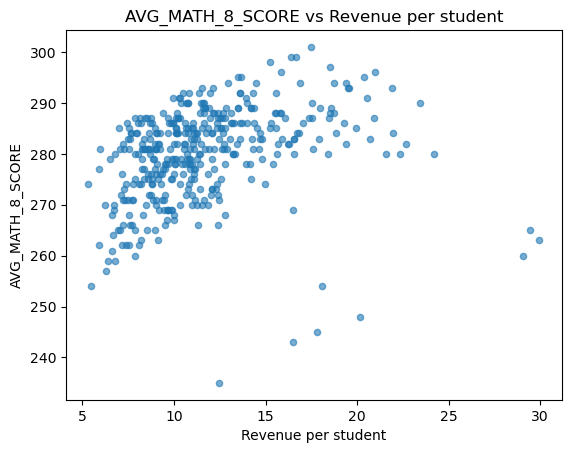

In [55]:
# @@@ 7
df["revenue_per_student"] = df["TOTAL_REVENUE"] / df["ENROLL_ALL_EST"].replace(0, np.nan)
df.plot.scatter(x="revenue_per_student", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel("Revenue per student")
plt.ylabel("AVG_MATH_8_SCORE")
plt.title(f"AVG_MATH_8_SCORE vs Revenue per student")
plt.show()

Like the expenditure per student there seems to be a postive correlation with revanue and test scores... However the trend is less defined that expenditure per student vs test score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [56]:
# @@@ 8

X = df[["expenditure_per_student", "revenue_per_student", "ENROLL_8"]].dropna()
y = df.loc[X.index, "AVG_MATH_8_SCORE"]

In [57]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [59]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [66]:
# @@@ 11
# create your model here
X_train.isna().sum()
X_train.dtypes
model = LinearRegression()
X_train.shape, y_train.shape


((856, 3), (856,))

In [67]:
model.fit(X_train, y_train)


ValueError: Input y contains NaN.

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [68]:
# @@@ 13

col_name = 'COLUMN NAME OF ONE PREDICTOR'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

KeyError: 'COLUMN NAME OF ONE PREDICTOR'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# @@@ 14
# Had difficulty completting last section

# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")